In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image

from tensorflow import keras
from sklearn.model_selection import train_test_split


In [12]:
data_train = pd.read_csv('data/emnist-balanced-train.csv')
data_test = pd.read_csv('data/emnist-balanced-test.csv')
mapp = pd.read_csv("data/emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None).squeeze("columns")
data_train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train_scaled = X_train / 255.0
X_train_scaled = X_train_scaled.astype('float32')
X_test_scaled = X_train / 255.0
X_test_scaled = X_test_scaled.astype('float32')

X_train_scaled = X_train_scaled.reshape(X_train_scaled[0],28,28,1)
X_test_scaled = X_train_scaled.reshape(-1,28,28,1)

X_train_scaled,val_scaled,y_train,val_target = train_test_split(X_train_scaled,y_train,train_size=0.2, random_state=42)
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)


(112799, 784) (112799,) (18799, 784) (18799,)


In [58]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(712,activation='relu',name='hidden1'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512,activation='relu',name='hidden2'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256,activation='relu',name='hidden3'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(48,activation='softmax',name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 712)               558920    
                                                                 
 dropout (Dropout)           (None, 712)               0         
                                                                 
 hidden2 (Dense)             (None, 512)               365056    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 hidden3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [59]:
from keras.optimizers import gradient_descent_v2 
learning_rate = 0.001
momentum = 0.9
sgd = gradient_descent_v2.SGD(learning_rate=learning_rate, momentum=momentum,  nesterov=True)
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [60]:
y_train = y_train.to_numpy()
val_scaled = val_scaled.reshape(-1,28,28)
val_target = val_target.to_numpy()
checkpoint = keras.callbacks.ModelCheckpoint('best-parameters.h5',save_best_only=True)
early_stoppping = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(X_train_scaled,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(val_scaled,val_target),callbacks=[checkpoint,early_stoppping])

Epoch 1/10
1128/1128 [==============================] - 9s 8ms/step - loss: 3.2145 - accuracy: 0.1704 - val_loss: 1.9900 - val_accuracy: 0.4953
Epoch 2/10
1128/1128 [==============================] - 9s 8ms/step - loss: 2.0035 - accuracy: 0.4361 - val_loss: 1.4242 - val_accuracy: 0.6013
Epoch 3/10
1128/1128 [==============================] - 8s 7ms/step - loss: 1.5846 - accuracy: 0.5403 - val_loss: 1.2153 - val_accuracy: 0.6493
Epoch 4/10
1128/1128 [==============================] - 8s 7ms/step - loss: 1.3918 - accuracy: 0.5921 - val_loss: 1.0823 - val_accuracy: 0.6811
Epoch 5/10
1128/1128 [==============================] - 8s 7ms/step - loss: 1.2529 - accuracy: 0.6260 - val_loss: 0.9976 - val_accuracy: 0.7011
Epoch 6/10
1128/1128 [==============================] - 8s 7ms/step - loss: 1.1457 - accuracy: 0.6514 - val_loss: 0.9134 - val_accuracy: 0.7234
Epoch 7/10
1128/1128 [==============================] - 8s 7ms/step - loss: 1.0668 - accuracy: 0.6762 - val_loss: 0.8755 - val_accuracy:

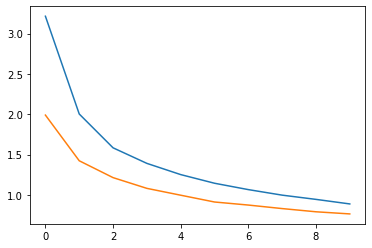

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


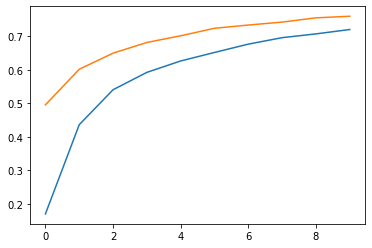

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

(28, 28, 3)


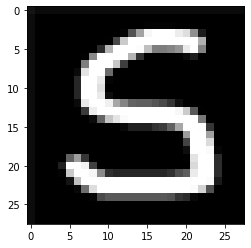

[[6.6326502e-14 1.9684378e-19 7.6076550e-09 5.3059845e-10 2.9799214e-21
  1.8190473e-14 1.5798415e-16 8.2578258e-13 4.3868957e-05 4.7534689e-14
  4.4463105e-12 9.9995422e-01 1.3461040e-15 5.2929482e-07 1.2370142e-10
  4.8915241e-14 1.5152543e-10 6.1776193e-14 1.5411905e-17 7.7216842e-16
  1.6467744e-13 1.1761843e-18 2.2836451e-12 8.3352245e-16 2.4044258e-16
  3.6144265e-11 2.2878872e-08 1.1726300e-06 7.3532407e-13 1.3008217e-16
  4.9032260e-15 3.9034030e-19 1.5183005e-14 1.0958846e-12 4.7937923e-15
  2.2429253e-08 1.0746448e-09 8.5922355e-13 1.1595171e-13 1.1609450e-12
  5.0500206e-15 1.9987564e-07 3.6228515e-16 1.0715705e-13 7.7719269e-11
  4.4068871e-17 3.7343292e-18 3.8120430e-15]]
예측 문자 : B


In [112]:
img = cv2.imread('example.png')
print(img.shape)

img = np.fliplr(img)
img = np.rot90(img)
plt.imshow(img)
plt.show()
img = (255-img[:,:,0].reshape(1,28,28))/255.0


model = keras.models.load_model("parameters.h5",compile = True)
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

result = model.predict(img)
print(result)

pred_class = np.argmax(result)
pred_letter = chr(mapp[pred_class])
print(f"예측 문자 : {pred_letter}")



(784,)


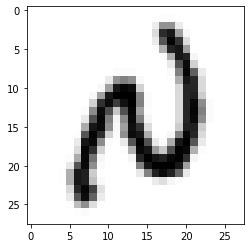

예측 문자 : S , 실제 문자 : S


In [109]:
n = len(X_test)
rd = np.random.randint(n)
print(X_test[rd].shape)
saveimg = Image.fromarray(X_test[rd].reshape(28,28).astype(np.uint8))
saveimg.save('result.png','png')
x_scaled = X_test[rd].reshape(1,28,28)
plt.imshow(x_scaled.reshape(28,28),cmap='gray_r')
plt.show()
result = model.predict(x_scaled)

pred_class = np.argmax(result)
pred_letter = chr(mapp[pred_class])
print(f"예측 문자 : {pred_letter} , 실제 문자 : {chr(mapp[y_test[rd]])}")
